# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1


In [2]:
# 시각화 모듈 설정
# 참고용 차트를 출력하기 위함

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 문제 개요

다음은 폴더블 폰의 힌지에 들어가는 스프링 내구력을 테스트한 실험 결과이다. 

스프링 측정값과 스프링에 가한 부하 정보와 함께, 테스트 통과/실패 (failure) 결과가 기재되어 있다. 

개발부서는 테스트 비용을 줄이기 위해 failure 여부를 맞추는 모델을 만들고자 한다.

변수명은 보안을 위해 measurement_0과 같이 익명화되었다.

데이터 구성

학습데이터: train_prob.csv, 21,458 rows, 25 columns

테스트데이터: test_prob.csv, 5,112 rows, 24 columns, 

테스트정답셋: test_prob_ans.csv, 5,112 rows, 1 columns


컬럼명	설명	타입

|변수명|설명|타입|
|--|--------------|------|
|id|실험 고유 번호|정수형|
|product_code|스프링 코드|범주형|
|loading|스프링에 가한 부하|실수형|
|attribute_0|구성 소재1|범주형|
|attribute_1|구성 소재2|범주형|
|attribute_2|구성 소재3|정수형|
|attribute_3|구성 소재4|정수형|
|measurement_0 ~ 17|측정값 0~17|실수형|
|failure|성공여부|이진형(0, 1)|


# 전처리(Preprocessing)

train_prob.csv를 불러 온다. 이를 basetable이리고 한다.

In [29]:
df_basetable = pd.read_csv('train_prob.csv', index_col='id')
df_basetable

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                              
0                A    80.10  material_7  material_8            9            5   
1                A    84.89  material_7  material_8            9            5   
2                A    82.43  material_7  material_8            9            5   
3                A   101.07  material_7  material_8            9            5   
4                A   188.06  material_7  material_8            9            5   
...            ...      ...         ...         ...          ...          ...   
26565            E   158.95  material_7  material_6            6            9   
26566            E   146.02  material_7  material_6            6            9   
26567            E   115.62  material_7  material_6            6            9   
26568            E   106.38  material_7  material_6            6            9   
26569            E   131.20  material_7  material_6            6            9   

       measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                                 ...   
0                  7              8              4         18.040  ...   
1                 14              3              3         18.213  ...   
2                 12              1              5         18.057  ...   
3                 13              2              6         17.295  ...   
4                  9              2              8         19.346  ...   
...              ...            ...            ...            ...  ...   
26565              6             16              4         16.301  ...   
26566             10             12              8         17.543  ...   
26567              1             10              1         15.670  ...   
26568              2              9              4         18.059  ...   
26569              6             19              1         18.034  ...   

       measurement_9  measurement_10  measurement_11  measurement_12  \
id                                                                     
0             10.672          15.859          17.594          15.193   
1             12.448          17.947          17.915          11.755   
2             12.715          15.607             NaN          13.798   
3             12.471          16.346          18.377          10.020   
4             10.337          17.082          19.932          12.428   
...              ...             ...             ...             ...   
26565            NaN          12.177          17.942          10.112   
26566         11.242          14.179          20.564          10.234   
26567         11.407          16.437          17.476           8.668   
26568         11.392          17.064          17.814          14.928   
26569         10.611          15.603          19.703          11.006   

       measurement_13  measurement_14  measurement_15  measurement_16  \
id                                                                      
0              15.029             NaN          13.034          14.684   
1              14.732          15.425          14.395          15.631   
2              16.711          18.631          14.094          17.946   
3              15.250          15.562          16.154          17.172   
4              16.182          12.760          13.153          16.412   
...               ...             ...             ...             ...   
26565          15.795          18.572          16.144             NaN   
26566          14.450          14.322          13.146          16.471   
26567          15.069          16.599          15.590          14.065   
26568          16.273          15.485          13.624          12.865   
26569          15.875          13.366          16.527          17.890   

       measurement_17  failure  
id                              
0             764.100        0  
1  

In [30]:
df_basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 26569
Data columns (total 25 columns):
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
measurement_15    19855 non-null float64
me

## 단계 1

basetable에 measurement_3 ~17 각각의 행이 결측인지 나타내는 파생 변수를 만든다. 

파생 변수는 이진 형식이고, False는 미결측 True는 결측을 의미한다. 

파생 변수의 이름은 measurement 번호에 따라 isna_3 ~ 17로 한다. 

In [31]:
df_basetable[['isna_{}'.format(i) for i in range(3, 18)]] = \
                df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].isna()

In [32]:
df_basetable[['isna_{}'.format(i) for i in range(3, 18)]].sum()

isna_3      312
isna_4      442
isna_5      565
isna_6      640
isna_7      766
isna_8      853
isna_9      989
isna_10    1059
isna_11    1180
isna_12    1287
isna_13    1395
isna_14    1482
isna_15    1603
isna_16    1708
isna_17    1818
dtype: int64

## 단계 2

이 과제를 맡은 데이터분석가 지희는 measurement_3~17의 결측치 처리 방안을 고민하던 중, 

개발부서에서 measurement_17은 product_code별로 failure를 예측하기 위해 

measurement_3 ~ measurement_9을 다음과 같이 선형 조합하여 생성한 값이라는 정보를 받았다. 

$measurement_{17}=\beta_{3}measurement_{3}+\beta_{4}measurement_{4}+...+\beta_{9}measurement_{9}$

이는 즉,

$measurement_{3}=\beta'_{4}measurement_{4}+\beta'_{5}measurement_{5}+...+\beta'_{9}measurement_{9}+\beta'_{17}measurement_{17}$

...

$measurement_{9}=\beta''_{3}measurement_{3}+\beta''_{4}measurement_{4}+...+\beta''_{8}measurement_{8}+\beta''_{17}measurement_{17}$

와 같이 measurement_3 ~ measurement_9의 각 변수들도 나머지 변수들과 선형 관계를 지닌다. 

이 점을 이용하여 대상 변수를 번갈아 가면서 예측 모델을 만들어 최대한 원래 값에 가깝게 복원할 수 있다. 

이러한 반복적인 결측치 복원 방법을 사내 데이터분석 연구소에 문의 했더니 다음과 같은 가이드를 주었다. 

> sklearn 모듈에 아직은 실험 단계이지만, 비슷한 경우에 문제 없이 사용했던 사례가 있어 의견을 드립니다. 

> from sklearn.experimental import enable_iterative_imputer 구문을 사용하여 실험 단계인 모듈을 활성화하고, 

> sklearn.impute.IterativeImputer를 사용한다면 원하는 결과를 얻을 수 있습니다.

가이드의 내용을 참조하여 basetable의 measurement_3~9와 measurement_17 결측치를 복원하라.


입력 변수] measurement_3 ~ 9, measurement_17 (입력 변수 순서에 유의)

---
**함수가이드**

sklearn.experimental.enable_iterative_imputer

sklearn.impute.IterativeImputer, random_state=123

sklearn.linear_model.LinearRegression

문제 지시사항 외 Default 값 사용

---


In [17]:
# Tip: groupby를 이용한 범주형 변수의 수준별로 모델을 만들어 적용하는 루틴을 소개합니다.

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = ['measurement_{}'.format(i) for i in range(3, 10)]

# groupby ~ apply를 통해 수준별로 모델을 만들면 Series 형태로 수준별로 Series 형태로 만들어지게 됩니다.
# 이 과정에서 dropna를 통해 입력 변수에 결측을 제거합니다.
s_lr = df_basetable.dropna().groupby('product_code').apply(
    lambda x: LinearRegression().fit(x[X], x['measurement_17']) # ※ 각각에 대해 인스턴스를 생성해야 합니다.
)

# 수준별로 measurment_17에 대한 r^2를 구해봅니다.
df_basetable.dropna().groupby('product_code').apply(
    lambda x: r2_score(x['measurement_17'],s_lr.loc[x.name].predict(x[X]))
)

product_code
A    0.999977
B    0.999980
C    0.999982
E    0.999987
dtype: float64

In [25]:
# 방법1: groupby를 활용한 방법입니다. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
# groupby ~ apply를 통해 product_code의 수준별로 IterativeImputer 모델을 만듭니다.
s_imp = df_basetable.groupby('product_code').apply(
    lambda x: IterativeImputer(estimator = LinearRegression(), random_state = 123).fit(x[X_imp])
)
# groupby ~ apply를 통해 각 모델의 transform 메소드를 통해 결측치를 채웁니다.
# apply의 lambda 함수의 x.name에는 groupby에 의해 구분된 수준의 값들이 들어 갑니다.
# 이를 활용하면 s_imp에서 필요한 model을 가져올수 있게 되어 수준별로 모델을 적용을 시킬수 있게 됩니다.
df_basetable[X_imp] = df_basetable.groupby('product_code').apply(
    lambda x: pd.DataFrame(s_imp.loc[x.name].transform(x[X_imp]), index=x.index, columns=X_imp)
)
df_basetable[X_imp].isna().sum()

measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_17    0
dtype: int64

In [33]:
# 방법2: 반복문을 사용해봅니다.
X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
for i in df_basetable['product_code'].unique():
    imp = IterativeImputer(estimator = LinearRegression(), random_state = 123)
    print(i)
    # 각 수준별로 대상 행들을 가져오고, fit_transform으로 모델을 만든고 결측치를 채운 값을 바로 대입합니다.
    # 주의 점은 df_basetable.loc[df_basetable['product_code'] == i][X_imp]로 대입을 해준다면, 
    # reference warning을 받게됩니다. 따라서 아래와 같이 필터링한 다음 바로 값이 입력이 되도록 
    # df_basetable.loc[df_basetable['product_code'] == i, X_imp]을 씁니다.
    df_basetable.loc[df_basetable['product_code'] == i, X_imp] = \
                    imp.fit_transform(df_basetable.loc[df_basetable['product_code'] == i, X_imp])
df_basetable[X_imp].isna().sum()

A
B
C
E


measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_17    0
dtype: int64

## 단계 3

measurement_10~16까지의 결측치는 모두 product_code별 평균으로 대치한다.

In [38]:
df_basetable[['measurement_{}'.format(i) for i in range(10, 17)]] = \
            df_basetable.groupby('product_code')[['measurement_{}'.format(i) for i in range(10, 17)]]\
                        .apply(lambda x: pd.DataFrame(x.fillna(x.mean()), index=x.index, columns=x.columns))
df_basetable[['measurement_{}'.format(i) for i in range(10, 17)]].isna().sum()

measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
dtype: int64

In [45]:
df_basetable[['measurement_{}'.format(i) for i in range(10, 17)]] = \
            df_basetable.groupby('product_code')[['measurement_{}'.format(i) for i in range(10, 17)]]\
                        .transform(lambda x: x.fillna(x.mean()))
df_basetable[['measurement_{}'.format(i) for i in range(10, 17)]].isna().sum()

measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
dtype: int64

Hint] 전처리 단계에서 보간 결과를 확인해 보기 위한 각 변수의 평균과 표본표준편차.

| |3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|
|-|-|-|-|-|-|-|-|--|--|--|--|--|--|--|--|
|mean|17.796|11.736|17.131|17.506|11.719|19.022|11.434|16.034|19.194|11.734|15.666|16.033|15.051|16.398|701.768|
|std|0.997|0.994|0.994|0.992|0.993|1.005|0.997|1.278|1.579|1.433|1.149|1.461|1.478|1.671|119.180|

열의 이름의 숫자는 measurement_ 번호, 값은 소수점 3째 자리까지 반올림

In [44]:
df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].agg(['mean', 'std'])\
            .rename(columns=lambda x: x.split('_')[1])\
            .applymap(lambda x: round(x, 3))

3       4       5       6       7       8       9      10      11  \
mean  17.796  11.736  17.131  17.506  11.719  19.022  11.434  16.034  19.194   
std    0.997   0.994   0.994   0.992   0.993   1.005   0.997   1.278   1.579   

          12      13      14      15      16       17  
mean  11.734  15.666  16.033  15.051  16.398  701.768  
std    1.433   1.149   1.461   1.478   1.671  119.180

In [55]:
df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].agg(['mean', 'std'])\
            .rename(columns=lambda x: x.split('_')[1])\
            .apply(lambda x: round(x, 3))

3       4       5       6       7       8       9      10      11  \
mean  17.796  11.736  17.131  17.506  11.719  19.022  11.434  16.034  19.194   
std    0.997   0.994   0.994   0.992   0.993   1.005   0.997   1.278   1.579   

          12      13      14      15      16       17  
mean  11.734  15.666  16.033  15.051  16.398  701.768  
std    1.433   1.149   1.461   1.478   1.671  119.180

# 문제1

(basetable을 사용) measurement_3~16까지 결측 여부가 failure에 영향이 있는지를 파악하고, 

failure를 분류하는 데 도움이 될 만한 것은 예측 모델의 입력 변수로 사용하고자 한다. 

이를 위해 전처리 과정에서 뽑아낸 isna_3~16을 활용한다.

n이 3부터 16까지, 즉 measurement_3~16까지 다음의 검정을 수행한다. 

$H_0: P(failure=True|measurement_{n}=Missing)=P(failure=True)$

$H_1: P(failure=True|measurement_{n}=Missing) \neq P(failure=True)$

모집단의 $P(failure=True) = 0.2114$


## 단계 1-1

우선, measurement_3으로 위 검정을 시행해보자.

$H_0: P(failure=True|isna_{3}=True)=0.2114$

$H_1: P(failure=True|isna_{3}=True) \neq 0.2114$

으로 바꿀 수 있다.

$P(failure=True|isna_{3}=True)$은 표본수가 충분하여 중심극한정리에 의해 정규분포를 따르는 것은 분석가 간에 이견이 없다고 한다. 

위 검정의 p-value를 구하여 보고 힌트에 주어진 p-value와 비교하여 검정 방법에 문제가 없음을 확인하라.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---

 Hint] p-value는 0.0037(소수점 다섯째 자리에서 반올림하여 넷째 자리까지 표시)


In [70]:
from scipy.stats import norm
P_true = 0.2114 # 모집단의 확률 - 평균 (표본 공간이 {0,1} 이므로 확률이 곧 평균입니다.)
P_var = P_true * (1 - P_true) # 베르누이 분포의 분산은 확률에서 도출이 됩니다 p × (1 - p), 즉 모분산을 구할 수 있습니다.

P_sample_true = P_true # 샘플의 비율은 모집단의 평균입니다.
n_sample = df_basetable['isna_3'].sum() # 분산을 구하기 위해 해당 샘플 수를 구합니다.
P_sample_var = P_var / n_sample # 샘플의 확률(평균)에 대한 분산을 구합니다.

P_observed_true = df_basetable.loc[df_basetable['isna_3'], 'failure'].mean() # 관측치의 확률(평균)을 구합니다.
# 표준정규분포에 적용하기 위한, 통계량을 구합니다.
# 양측 검정이므로, 모든 케이스에 좌측 꼬리 영역을 구하도록하기 위해 통계량을 무조건 음수가 나오도록, 절대값에 음수를 처리합니다.
Z = -abs((P_observed_true - P_sample_true) / (P_sample_var ** 0.5)) 
pvalue = norm.cdf(Z) * 2

P_sample_true, n_sample, P_sample_var, P_observed_true, Z, pvalue

(0.2114,
 312,
 0.0005343270512820513,
 0.14423076923076922,
 -2.905807189028007,
 0.0036630709140241546)

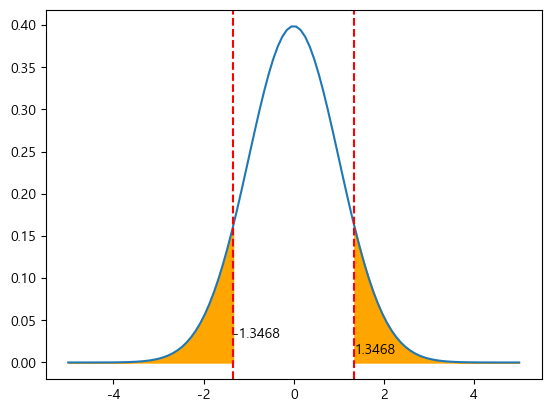

In [62]:
# 표준정규 분포를 이용한 pvalue 도출을 그래프로 도식화 해봅니다.
from scipy.stats import norm
P_true = 0.2114
col = 'isna_{}'.format(4)
P_var = P_true * (1 - P_true)
n_samples = df_basetable[col].sum()
P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
P_missing_var = P_var / n_samples
P_missing_std = P_missing_var ** 0.5

stat = -abs((P_missing_true - P_true) / P_missing_std)

plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(stat, color='red', linestyle='--')
plt.text(stat, 0.03, str(stat)[:7])
plt.axvline(-stat, color='red', linestyle='--')
plt.text(-stat, 0.01, str(-stat)[:6])
plt.fill_between(np.linspace(-5, stat, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-5, stat, 100)), color='orange')
plt.fill_between(np.linspace(-stat, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(-stat, 5, 100)), color='orange')

plt.show()

In [80]:
# statsmodels에서 제공하는 함수를 통해 구해봅니다.
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(
    df_basetable.loc[df_basetable['isna_3'], 'failure'].sum(), # failure(positive 케이스)가 관측된 수
    df_basetable['isna_3'].sum(), # 관측데이터 수
    P_true, # 귀무가설에서의 비율 
    'two-sided', # 대립가설의 종류 
    P_true # 분산을 구하기 위한 비율
)

(-2.905807189028007, 0.0036630709140241546)

## 단계 1-2

measuremenet_3을 포함하여 measurement_4 ~ 16까지 위 검정을 반복하고 

귀무가설을 기각할 수 있는 경우의 p-value의 합을 A라고 한다. (유의 수준은 5%로 한다.)

In [73]:
from scipy.stats import norm

P_true = 0.2114
P_var = P_true * (1 - P_true)

P_sample_true = P_true
A = 0
# 반복문을 통하여 다른 변수에 대해서도 적용해봅니다.
for i in range(3, 17):
    na_col = 'isna_{}'.format(i)
    n_sample = df_basetable[na_col].sum()
    P_sample_var = P_var / n_sample

    P_observed_true = df_basetable.loc[df_basetable[na_col], 'failure'].mean()
    Z = -abs((P_observed_true - P_sample_true) / (P_sample_var ** 0.5))
    pvalue = norm.cdf(Z) * 2
    if pvalue < 0.05:
        A += pvalue
        print('*', i, Z, pvalue)
    else:
        print(i, Z, pvalue)
A

* 3 -2.905807189028007 0.0036630709140241546
4 -1.3468241702718833 0.17803686833140808
* 5 -2.2213833417706925 0.026325008335499278
6 -0.2617796136561279 0.793491357072205
7 -0.8909035498642803 0.37298091572329806
8 -0.6980509343383379 0.48514534123655306
9 -0.5393439841397007 0.589649524697301
10 -0.7622002829475777 0.44594047726157915
11 -0.1035248797832757 0.9175464043670771
12 -0.6095281379895136 0.5421744277936988
13 -0.45265767845606597 0.6507952588133231
14 -0.681066949794218 0.49582912857498873
15 -0.0076954319495023404 0.9938599942603648
16 -0.4783142261813061 0.6324265724265041


0.029988079249523434

## 단계 1-3

검정 결과 귀무가설을 기각할 수 있는 경우는 총 두 건이다. 

해당 파생 변수명의 뒷 자리 번호 순으로 na_1, na_2로 파생 변수를 만들어 prob1 데이터셋을 생성하라.

In [74]:
df_prob1 = df_basetable.assign(
    na_1 = lambda x: x['isna_3'],
    na_2 = lambda x: x['isna_5'],
)
df_prob1

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                              
0                A    80.10  material_7  material_8            9            5   
1                A    84.89  material_7  material_8            9            5   
2                A    82.43  material_7  material_8            9            5   
3                A   101.07  material_7  material_8            9            5   
4                A   188.06  material_7  material_8            9            5   
...            ...      ...         ...         ...          ...          ...   
26565            E   158.95  material_7  material_6            6            9   
26566            E   146.02  material_7  material_6            6            9   
26567            E   115.62  material_7  material_6            6            9   
26568            E   106.38  material_7  material_6            6            9   
26569            E   131.20  material_7  material_6            6            9   

       measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                                 ...   
0                  7              8              4         18.040  ...   
1                 14              3              3         18.213  ...   
2                 12              1              5         18.057  ...   
3                 13              2              6         17.295  ...   
4                  9              2              8         19.346  ...   
...              ...            ...            ...            ...  ...   
26565              6             16              4         16.301  ...   
26566             10             12              8         17.543  ...   
26567              1             10              1         15.670  ...   
26568              2              9              4         18.059  ...   
26569              6             19              1         18.034  ...   

       isna_10  isna_11  isna_12  isna_13  isna_14  isna_15  isna_16  isna_17  \
id                                                                              
0        False    False    False    False     True    False    False    False   
1        False    False    False    False    False    False    False    False   
2        False     True    False    False    False    False    False    False   
3        False    False    False    False    False    False    False    False   
4        False    False    False    False    False    False    False    False   
...        ...      ...      ...      ...      ...      ...      ...      ...   
26565    False    False    False    False    False    False     True    False   
26566    False    False    False    False    False    False    False    False   
26567    False    False    False    False    False    False    False    False   
26568    False    False    False    False    False    False    False    False   
26569    False    False    False    False    False    False    False    False   

        na_1   na_2  
id                   
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
26565  False  False  
26566  False  False  
26567  False  False  
26568  False  False  
26569  False  False  

[21458 rows x 42 columns]

In [75]:
A

0.029988079249523434

A의 값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오. 

**0.030**

# 문제 2

첫째는 스프링 개발 업체들은 실험이 제품 별로 공정하게 진행이 됐는지를 의문을 가지고 있다.

product_code에 따라 개발 업체가 다르다. 

product_code에 대해서 스프링에 가한 부하(loading)를 동일하게 했는지 조사하라.

둘째는, attribute_0와 attribute_1은 스프링을 구성하는 주요 소재이다. 

failure와는 관계가 없음이 이전에 검증되었다. 

하지만, 이에 대한 재확인 요청을 받아 attribute_0와 attribute_1은 failure와 상관없음을 확인한다.

이를 위해 다음 단계를 수행하라.


## 단계 2-1

prob1에서 입력 변수 loading에 결측이 없는 행들을 뽑아 prob2 데이터프레임을 만든다.

Hint] prob2의 데이터 수는 21,257 이다.


In [82]:
df_prob2 = df_prob1.loc[df_prob1['loading'].notna()].copy()
df_prob2

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                              
0                A    80.10  material_7  material_8            9            5   
1                A    84.89  material_7  material_8            9            5   
2                A    82.43  material_7  material_8            9            5   
3                A   101.07  material_7  material_8            9            5   
4                A   188.06  material_7  material_8            9            5   
...            ...      ...         ...         ...          ...          ...   
26565            E   158.95  material_7  material_6            6            9   
26566            E   146.02  material_7  material_6            6            9   
26567            E   115.62  material_7  material_6            6            9   
26568            E   106.38  material_7  material_6            6            9   
26569            E   131.20  material_7  material_6            6            9   

       measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                                 ...   
0                  7              8              4         18.040  ...   
1                 14              3              3         18.213  ...   
2                 12              1              5         18.057  ...   
3                 13              2              6         17.295  ...   
4                  9              2              8         19.346  ...   
...              ...            ...            ...            ...  ...   
26565              6             16              4         16.301  ...   
26566             10             12              8         17.543  ...   
26567              1             10              1         15.670  ...   
26568              2              9              4         18.059  ...   
26569              6             19              1         18.034  ...   

       isna_10  isna_11  isna_12  isna_13  isna_14  isna_15  isna_16  isna_17  \
id                                                                              
0        False    False    False    False     True    False    False    False   
1        False    False    False    False    False    False    False    False   
2        False     True    False    False    False    False    False    False   
3        False    False    False    False    False    False    False    False   
4        False    False    False    False    False    False    False    False   
...        ...      ...      ...      ...      ...      ...      ...      ...   
26565    False    False    False    False    False    False     True    False   
26566    False    False    False    False    False    False    False    False   
26567    False    False    False    False    False    False    False    False   
26568    False    False    False    False    False    False    False    False   
26569    False    False    False    False    False    False    False    False   

        na_1   na_2  
id                   
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
26565  False  False  
26566  False  False  
26567  False  False  
26568  False  False  
26569  False  False  

[21257 rows x 42 columns]

## 단계 2-2

prob2에 loading의 각 행들에 자연 로그 함수를 적용하여 파생 변수 loading_log를 만든다.


In [86]:
df_prob2['loading_log'] = np.log(df_prob2['loading'])
df_prob2

product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
id                                                                              
0                A    80.10  material_7  material_8            9            5   
1                A    84.89  material_7  material_8            9            5   
2                A    82.43  material_7  material_8            9            5   
3                A   101.07  material_7  material_8            9            5   
4                A   188.06  material_7  material_8            9            5   
...            ...      ...         ...         ...          ...          ...   
26565            E   158.95  material_7  material_6            6            9   
26566            E   146.02  material_7  material_6            6            9   
26567            E   115.62  material_7  material_6            6            9   
26568            E   106.38  material_7  material_6            6            9   
26569            E   131.20  material_7  material_6            6            9   

       measurement_0  measurement_1  measurement_2  measurement_3  ...  \
id                                                                 ...   
0                  7              8              4         18.040  ...   
1                 14              3              3         18.213  ...   
2                 12              1              5         18.057  ...   
3                 13              2              6         17.295  ...   
4                  9              2              8         19.346  ...   
...              ...            ...            ...            ...  ...   
26565              6             16              4         16.301  ...   
26566             10             12              8         17.543  ...   
26567              1             10              1         15.670  ...   
26568              2              9              4         18.059  ...   
26569              6             19              1         18.034  ...   

       isna_11  isna_12  isna_13  isna_14  isna_15  isna_16  isna_17   na_1  \
id                                                                            
0        False    False    False     True    False    False    False  False   
1        False    False    False    False    False    False    False  False   
2         True    False    False    False    False    False    False  False   
3        False    False    False    False    False    False    False  False   
4        False    False    False    False    False    False    False  False   
...        ...      ...      ...      ...      ...      ...      ...    ...   
26565    False    False    False    False    False     True    False  False   
26566    False    False    False    False    False    False    False  False   
26567    False    False    False    False    False    False    False  False   
26568    False    False    False    False    False    False    False  False   
26569    False    False    False    False    False    False    False  False   

        na_2  loading_log  
id                         
0      False     4.383276  
1      False     4.441356  
2      False     4.411949  
3      False     4.615813  
4      False     5.236761  
...      ...          ...  
26565  False     5.068590  
26566  False     4.983744  
26567  False     4.750309  
26568  False     4.667018  
26569  False     4.876723  

[21257 rows x 43 columns]

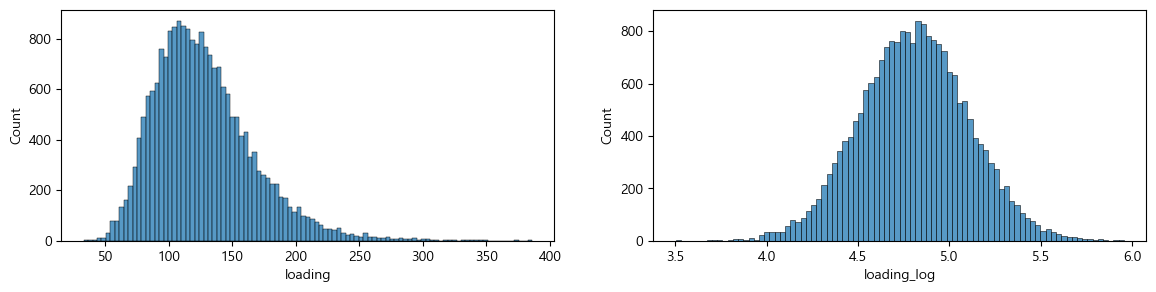

In [87]:
# 로그 변환이 어떤 효과를 보였는지, 보여주기 위한 참고용 코드입니다.
# 좌측으로 치우친 loading 변수가 log 변환을 통해 좌우 대칭형으로 변환되었음을 확인할 수 있습니다.

fig, axes = plt.subplots(1, 2, figsize=(14, 3) )
sns.histplot(data=df_prob2, x='loading', ax=axes[0])
sns.histplot(data=df_prob2, x='loading_log', ax=axes[1])
plt.show()

In [94]:
# loading 변환전과 변환후에 분포가 얼마나 정규분포에 가까운지, Kolmogorov-Smironov 검정을 사용하여 확인해봅니다.
# norm 함수들의 기본설정은 평균이 0 표준편차는 1인 표준정규분포입니다. 따라서 대상 표본집합은 표준화를 해야합니다.
# zscore는 대상 집합을 표준화해주는 함수인데요, ddof=1(자유도를 1 차감)을 하여 표본표준편차를 사용하여 변환을 해줍니다.
from scipy.stats import kstest, norm, zscore
(
    kstest(zscore(df_prob2['loading'], ddof=1), norm.cdf),
    kstest(zscore(df_prob2['loading_log'], ddof=1), norm.cdf),
)

(KstestResult(statistic=0.0600601378226141, pvalue=4.251798083024511e-67),
 KstestResult(statistic=0.004268034315027425, pvalue=0.8318549070535131))

## 단계 2-3

loading_log가 product_code 각각에 대해서 정규성을 지니고 있는지 확인하고자 한다.

이를 위해 Jarque-Bera로 검정하고 결과의 p-value가 0.05가 넘는 product_code의 수를 B라고 하자.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [100]:
# 방법 1: 하드코딩 기반
# 각각의 product_code 별로 loading_log의 Series를 취한후 검정을 합니다.
from scipy.stats import jarque_bera
(
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log']),
    jarque_bera(df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log'])
)

(Jarque_beraResult(statistic=1.467731470333654, pvalue=0.4800496537264637),
 Jarque_beraResult(statistic=0.6168837955943998, pvalue=0.7345906322931469),
 Jarque_beraResult(statistic=7.536229242478234, pvalue=0.023095566154546443),
 Jarque_beraResult(statistic=0.04839464502051384, pvalue=0.9760930856160965))

In [108]:
# 방법 2: groupby ~ apply
# product_code로 그룹핑하여 loading_log에 대한 jarque_bera 검정을 하고, 검정 결과를 DataFrame으로 취하여
# 결과를 뽑아 냅니다.
B = 3
df_prob2.groupby('product_code')['loading_log'].apply(
    lambda x: pd.Series(jarque_bera(x), index=['stat', 'pvalue'])
).unstack().pipe(lambda x: x.loc[x['pvalue'] >= 0.05] )

stat    pvalue
product_code                    
A             1.467731  0.480050
B             0.616884  0.734591
E             0.048395  0.976093

## 단계 2-4

loading_log 변수를 product_code로 구분했을 때, 

등분산성을 보이는지 Bartlett 검정을 통해 확인한다.

검정 결과에서 p-value를 C라고 한다.

---

**함수 가이드**

 scipy.stats 에서 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [118]:
# 방법 1: 하드코딩 기반
# 각각의 product_code 별로 loading_log를 구하여 bartlett 함수에 넘겨줍니다.

from scipy.stats import bartlett

result_2_4 = bartlett(
    df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log']
)
C = result_2_4.pvalue
result_2_4, C

(BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675),
 0.5873433093297675)

In [119]:
# 방법 2: groupby ~ agg (apply도 가능합니다.) 
# product_code 별로 구분하여 loading_log를 리스트에 담아 product_code별 loading_log 리스트를 지닌 Series를 만듭니다.
# Series를 list로 만들고, list 각각의 element(loading_log 리스트)를 list unpacking 연산자 (*) 를 이용하여,
# bartlett에 전달합니다.

result_2_4 = bartlett(
    *df_prob2.groupby('product_code')['loading_log'].agg(list).tolist()
)
C = result_2_4.pvalue
result_2_4, C

(BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675),
 0.5873433093297675)

## 단계 2-5

product_code에 대한 분산분석(ANOVA)을 통해서 loading_log 평균에 차이가 있는지 검정한다.

그 결과 중 p-value를 D라고 한다.

---

**함수 가이드**

 scipy.stats 제공 기능 활용
 
 문제 지시사항 외 Default 값 사용
 
---


In [122]:
# 일원산(범주가 하나인, oneway) 분산분석(anova, f분포를 사용, f_)는 
# f_oneway 함수를 사용합니다.
from scipy.stats import f_oneway
result_2_5 = f_oneway(
    *df_prob2.groupby('product_code')['loading_log'].agg(list).tolist()
)
D = result_2_5.pvalue
result_2_5, D

(F_onewayResult(statistic=0.37177284134760413, pvalue=0.7733782072320899),
 0.7733782072320899)

## 단계 2-6

Chi-square 검정을 통해 attribute_0, attribute_1의 결합값이 failure와 연관이 있는지 조사하라. 

attribute_0, attribute_1의 결합값의 의미 attribute_0=material_7, attribute_1=material_8 이라면, 이 둘의 결합값은
matertial_7material_8를 의미한다.

(유의 수준 1%) 연관이 있다면 E값은 1 없으면 0으로 한다.

---

**함수 가이드**

 scipy.stats.chi2_contingency, correction=False
 
 문제 지시사항 외 Default 값 사용
 
---


In [130]:
# chi2_contingency를 두 범주간의 독립성을 검정합니다.
# 독립성 = 연관없음 = 동질성 이런 의미로도 사용됩니다.
# 이를 위해 두 범주간의 빈도수가 필요합니다.
from scipy.stats import chi2_contingency

result_2_6 = chi2_contingency(
    pd.crosstab( # pd.crosstab을 사용하여 두 범주간의 빈도수를 구합니다.
        index=df_prob2['attribute_0'] + df_prob2['attribute_1'],
        columns=df_prob2['failure']
    ), correction =False
)
E = 1 if result_2_6[1] < 0.01 else 0 # 유의 수준이 0.01, 귀무가설(독립)이 기각 = 연관성 있다.
result_2_6, E

((7.0400463075335615,
  0.029598749837407304,
  2,
  array([[4106.03584702, 1102.96415298],
         [4162.79042198, 1118.20957802],
         [8487.17373101, 2279.82626899]])),
 0)

In [136]:
# 참고: 문제 1의 내용을 chi2 독립성 검정에 적용해볼 수 있습니다. 
# (방법이 다르므로, 결과에 차이는 있습니다.)
chi2_contingency(
    pd.crosstab(
        index = df_prob2['isna_3'],
        columns=df_prob2['failure']
    ), correction=False
)

(8.355326815163641,
 0.0038455829481504372,
 1,
 array([[16511.64002446,  4435.35997554],
        [  244.35997554,    65.64002446]]))

In [131]:
B, C, D, E, B + C + D + E

(3, 0.5873433093297675, 0.7733782072320899, 0, 4.360721516561858)

B + C + D + E의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 출력하시오.

**4.36**

# 문제 3 

로지스틱 회귀모델로 수치형 변수 measurement_0 ~ 17, 

loading과 이진형인 na_1, na_2 중에서 최적의 성능을 보이는 입력 변수들을 찾고자 한다.


## 단계 3-1

prob1을 복사하여 prob3을 만든다. loading의 결측치는 loading의 평균으로 대치한다.  

In [137]:
df_prob3 = df_prob1.copy()
df_prob3['loading'] = df_prob3['loading'].fillna(df_prob3['loading'].mean())
df_prob3['loading'].isna().sum()

0

## 단계 3-2: 
    
prob3를 80%는 학습데이터 prob3_train으로 20%는 테스트데이터 prob3_test로 나눈다. 

prob3_train의 failure가 1인 비율과 prob3_test의 failure가 1의 비율을 동일하게 한다.


---

**함수 가이드**

 sklearn.model_selection.train_test_split, random_state=123, 
 
 train과 test의 failure의 비율은 stratify 매개 변수를 이용하여 맞춘다.
 
 문제 지시사항 외 Default 값 사용
 
---

In [140]:
from sklearn.model_selection import train_test_split

# stratify에 기준이 되는 범주의 Series를 넘겨주면, 해당 범주의 비율을 맞추어(층화 분리) 분리합니다.
df_prob3_train, df_prob3_test = train_test_split(df_prob3, train_size=0.8, stratify=df_prob3['failure'], random_state=123)
df_prob3_train, df_prob3_test = df_prob3_train.copy(), df_prob3_test.copy()

## 단계 3-3

prob3_train의 수치형 입력 변수 loading, measurement_0 ~ 17을 표준화한다. 

prob3_train의 표준화 설정으로 prob3_test의 loading, measurement_0 ~ 17에도 적용한다. 

표준화 처리한 prob3_train과 prob3_test는 문제 4와 문제 5에서 사용한다.


---

**함수 가이드**

 sklearn.preprocessing 제공 기능 활용, 
 
 문제 지시사항 외 Default 값 사용
 
---


In [144]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)]
df_prob3_train[X_std] = std_scaler.fit_transform(df_prob3_train[X_std])
df_prob3_test[X_std] = std_scaler.transform(df_prob3_test[X_std])

In [145]:
df_prob3_train[X_std].agg(['mean', 'std'])

loading  measurement_0  measurement_1  measurement_2  \
mean  2.139989e-16  -8.920072e-17  -1.080343e-16  -6.871146e-17   
std   1.000029e+00   1.000029e+00   1.000029e+00   1.000029e+00   

      measurement_3  measurement_4  measurement_5  measurement_6  \
mean   2.076245e-15   4.730122e-16   1.432593e-15  -2.142059e-16   
std    1.000029e+00   1.000029e+00   1.000029e+00   1.000029e+00   

      measurement_7  measurement_8  measurement_9  measurement_10  \
mean  -6.689019e-16  -2.198767e-15  -1.998841e-15    3.909517e-16   
std    1.000029e+00   1.000029e+00   1.000029e+00    1.000029e+00   

      measurement_11  measurement_12  measurement_13  measurement_14  \
mean   -1.405532e-15   -4.996068e-16    9.722051e-16   -4.014653e-15   
std     1.000029e+00    1.000029e+00    1.000029e+00    1.000029e+00   

      measurement_15  measurement_16  measurement_17  
mean   -5.573493e-16    3.583551e-16   -4.008858e-16  
std     1.000029e+00    1.000029e+00    1.000029e+00

In [146]:
df_prob3_test[X_std].agg(['mean', 'std'])

loading  measurement_0  measurement_1  measurement_2  measurement_3  \
mean -0.012128       0.002899      -0.018824       0.026778       0.008819   
std   0.988545       1.017625       0.978095       1.015628       1.011319   

      measurement_4  measurement_5  measurement_6  measurement_7  \
mean       0.004858       0.017221      -0.008580      -0.013296   
std        0.986469       0.982998       0.995606       0.982849   

      measurement_8  measurement_9  measurement_10  measurement_11  \
mean      -0.001396       0.022965       -0.003753       -0.000548   
std        1.000750       1.020788        1.021548        0.992102   

      measurement_12  measurement_13  measurement_14  measurement_15  \
mean        0.025345        0.010671        0.016924       -0.001131   
std         0.993806        0.998137        1.005824        0.991199   

      measurement_16  measurement_17  
mean        0.044992        0.011926  
std         0.999155        0.999505

## 단계 3-4
    
로지스틱 회귀모델을 사용하여 loading, measurement_0~17과 na_1, na_2를 입력 변수로 하여 prob3_train을 학습한다. 

로지스틱 회귀모델을 prob3_test로 성능을 측정한 값을 A라고 한다.

입력 변수: loading, measurement_0~17, na_1, na_2

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---

**함수 가이드**

 sklearn.linear_model.LogisticRegression, solver='lbfgs', 문제 지시사항 외 Default 값 사용
 
 sklearn.metrics.roc_auc_score
 
---

In [153]:
from sklearn.linear_model import LogisticRegression
# roc_auc_score는 postive class일 가능성을 나타내는 수치(score)를 넘겨 줍니다.
# 이 score를 기준으로 False Postive Rate에 대응하는 True Positive Rate 를 구하고, 
# 이를 도식화 하면 곡선 형태가 됩니다. 이 곡선의 영역이 바로 area under of ROC curve
# 분류기의 분별력은 나타내는 수치로 0.5는 분별력이 없을 때, 1은 가장 좋을 때를 나타냅니다.
# Label 값은 변별력을 나타내기 힘듭니다. 주로 분류기에서는 Positive일 확률, 
# LogisticRegression 경우에는 Logit을 넘기기도 합니다.
from sklearn.metrics import roc_auc_score

X_lr = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)] + ['na_1', 'na_2']
clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(df_prob3_train[X_lr], df_prob3_train['failure'])
# Positive 확률을 넘깁니다.
roc_auc_score(df_prob3_train['failure'], clf_lr.predict_proba(df_prob3_train[X_lr])[:, 1])

0.5952982435574312

In [158]:
# decision_function은 logit 값을 반환합니다.
# logit을 넘겨도 유효합니다. 
roc_auc_score(df_prob3_train['failure'], clf_lr.decision_function(df_prob3_train[X_lr]))

0.5952982435574312

In [159]:
A = roc_auc_score(df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1])
A

0.5792951262053387

In [163]:
# loading과 비교한다면, LogisticRegression 모델 
roc_auc_score(df_prob3_test['failure'], df_prob3_test['loading'])

0.5778277926972065

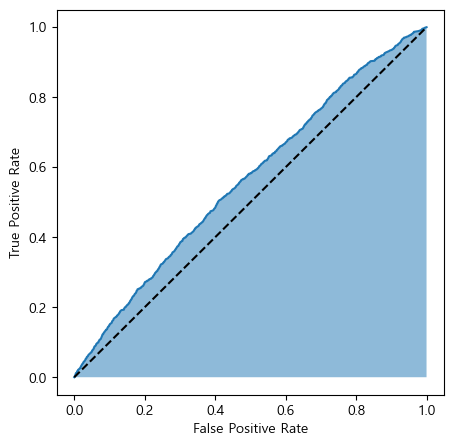

In [151]:
# ROC curve 그리기

df_roc = pd.DataFrame({'prob': clf_lr.predict_proba(df_prob3_test[X_lr])[:, 1],
 'label': df_prob3_test['failure']})
df_roc.sort_values('prob', ascending=False, inplace=True) # Positive 확률에 따른 False Positive 수를 구하기 위해 정렬
df_roc['fp'] = df_roc['label'].cumsum() # Positive 확률까지의 누적 False Positive 수
df_roc = df_roc['fp'].value_counts().sort_index().cumsum().reset_index() # False Positive에 따른 True Positive 수를 구한다.
df_roc.columns = ['tp', 'fp']
df_roc['fp'] = df_roc['fp'].shift(1).fillna(0) # shift를 해야만 False Positive 따른 True Positive 수가 맞춰진다.
df_roc['tpr'] = df_roc['tp'] / df_roc['tp'].iloc[-1] # Rate로 환산, 마지막 수는 True의 수이다.
df_roc['fpr'] = df_roc['fp'] / df_roc['fp'].iloc[-1] # Rate로 환산, 마지막 수는 False의 수이다.

plt.figure(figsize=(5, 5))
plt.plot(df_roc['fpr'], df_roc['tpr'])
plt.fill_between(df_roc['fpr'], df_roc['tpr'], np.zeros_like(df_roc['tpr']), alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 단계 3-5

loading, measurement_0 ~ 17, na_1, na_2를 후보 입력 변수로 한다. 

전진 선택법을 사용하여 이 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 

전진 선택법의 선택 기준은 prob3_train을 대상으로 5겹 층화교차검증(5-Fold stratified cross validation)을 하고 

겹외(OOF, Out-Of Fold) 성능의 평균값으로 한다. 전진 선택 과정에서 선택했던 변수를 제외하지 않는다. 

입력 변수: 본 단계 요건 참고

대상 변수: failure 

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

mlxtend.feature_selection.SequentialFeatureSelector

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

문제 지시사항 외 Default 값 사용

---

In [170]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True) # 5겹 층화교차검증(5-Fold stratified cross validation)
X_sfs = ['loading'] + ['measurement_{}'.format(i) for i in range(0, 18)] + ['na_1', 'na_2']
sfs = SequentialFeatureSelector(
    estimator = LogisticRegression(solver='lbfgs'),
    k_features='best',# 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 
    forward=True, # 전진 선택
    floating=False, # 선택했던 변수를 제외하지 않는다. 
    cv = cv,
    scoring='roc_auc' # _score 끝나면: _score를 뺍니다 ex) roc_auc_score -  roc_auc else neg_ ex) mean_squared_error - neg_mean_squared_error
)
sfs.fit(df_prob3_train[X_sfs], df_prob3_train['failure'])

SequentialFeatureSelector(clone_estimator=True,
                          cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, 

In [176]:
X_sfs_best = list(sfs.k_feature_names_)
X_sfs_best

['loading',
 'measurement_1',
 'measurement_4',
 'measurement_14',
 'measurement_17',
 'na_1']

## 단계 3-6

단계 3-5에서 찾은 최적의 입력 변수 조합으로 로지스틱 회귀모델을 사용하여 prob3_train을 학습하고 

prob3_test로 성능을 측정한 값을 B라고 한다.

입력 변수: **단계 3-5**에서 도출한 최적의 입력 변수 조합

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수 가이드**

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

문제 지시사항 외 Default 값 사용

---

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(df_prob3_train[X_sfs_best], df_prob3_train['failure'])
roc_auc_score(df_prob3_train['failure'], clf_lr.predict_proba(df_prob3_train[X_sfs_best])[:, 1])

0.5936682060775388

In [178]:
B = roc_auc_score(df_prob3_test['failure'], clf_lr.predict_proba(df_prob3_test[X_sfs_best])[:, 1])
B

0.5838326230092876

In [179]:
A, B, A - B

(0.5792951262053387, 0.5838326230092876, -0.004537496803948882)

A-B값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오

**-0.005**

# 문제 4

차원 축소 기법을 통한 데이터의 특성과 failure 분류 성능을 높힐 만한 요소를 살펴 본다. 

첫째로, loading을 제외하고, measurement_0 ~ 17을 입력으로 failure를 대상 변수로 Linear Discrimant Analysis(LDA) 모델을 만든다. 

범주가 두 개인 failure를 분류한다는 점에서 LDA 모델은 measurement_0 ~ 17를 한 개의 경계점으로 

failure를 최대한 정확하게 구분하도록 하나의 연속형 변수로 변환한다. 

실험 대상의 내구력을 나타낸다고 할 수 있는 LDA 변환값과 

실험에서 스프링에 가한 부하(loading)와 상관도를 측정하여, 

스프링에 따라 부하(loading)를 조정한 정도를 살펴본다.

둘째로, PCA를 사용하여 차원 감소로 failure 분류 성능에 얼마나 효과가 있을지 살펴본다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.


## 단계 4-1

prob3_train에서 measurement_0 ~ 17을 입력으로 failure를 대상 변수로 하여 LDA(Linear Discriminant Analysis) 모델을 학습한다. 

measurement_0 ~ 17에 대한 LDA의 변환값과 loading과 스피어만 상관도 (spearman correlation)의 p-value를 구하여 A라고 한다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

대상 변수] failure

---
**함수가이드**

sklearn.discriminant_analysis 제공 기능 활용

scipy.stats.spearmanr

문제 지시사항 외 Default 값 사용

---

In [192]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import spearmanr 
X_lda = ['measurement_{}'.format(i) for i in range(18)]
lda = LinearDiscriminantAnalysis()
result_4_1 = spearmanr(
    df_prob3_train['loading'],
    lda.fit_transform(df_prob3_train[X_lda], df_prob3_train['failure'])
)
A = result_4_1.pvalue
result_4_1, A

(SpearmanrResult(correlation=0.0029462997112993335, pvalue=0.6995009550811424),
 0.6995009550811424)

## 단계 4-2

prob3_train에서 measurement_0 ~ 17을 대상으로 주성분분석(Principal Component Analysis, PCA) 모델을 학습한다. 

분산 설명율이 높은 순으로 주성분을 변수명을 pca_0 ~ 17하여 prob3_train에 추가하여 prob4_train을 만든다. 

prob3_test에 prob3_train를 학습했던 PCA 모델로 동일한 방법으로 pca0 ~17 파생 변수를 추가하여 prob4_test를 만든다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

---
**함수가이드**

sklearn.decomposition.PCA, random_state=123

문제 지시사항 외 Default 값 사용

---


In [194]:
from sklearn.decomposition import PCA

X_pca = ['measurement_{}'.format(i) for i in range(18)]
pca = PCA(n_components=None, random_state=123)
pca.fit(df_prob3_train[X_pca])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [196]:
pca.explained_variance_

array([1.85613793, 1.41894459, 1.25547315, 1.1632852 , 1.06637856,
       1.05000212, 1.01995967, 1.00922255, 1.00657757, 0.99213623,
       0.98552903, 0.97614082, 0.97170312, 0.87532548, 0.81399432,
       0.70771288, 0.67969009, 0.15283534])

In [198]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10311277, 0.18193843, 0.25168287, 0.31630607, 0.37554587,
       0.43387592, 0.49053705, 0.5466017 , 0.60251942, 0.65763489,
       0.71238331, 0.7666102 , 0.82059056, 0.86921692, 0.91443619,
       0.95375128, 0.99150964, 1.        ])

In [201]:
# 
pca = PCA(n_components=0.40, random_state=123)
pca.fit(df_prob3_train[X_pca])

PCA(copy=True, iterated_power='auto', n_components=0.4, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [209]:
pca = PCA(n_components=None, random_state=123)
df_prob4_train = df_prob3_train.copy()
df_prob4_test = df_prob3_test.copy()

df_prob4_train[['pca{}'.format(i) for i in range(18)]] = \
        pd.DataFrame(pca.fit_transform(df_prob3_train[X_pca]), index=df_prob3_train.index)
df_prob4_test[['pca{}'.format(i) for i in range(18)]] = \
        pd.DataFrame(pca.transform(df_prob3_test[X_pca]), index=df_prob3_test.index)

In [207]:
df_prob3_train

product_code   loading attribute_0 attribute_1  attribute_2  \
id                                                                  
12186            C -0.577100  material_7  material_8            5   
7532             B  1.853148  material_5  material_5            8   
5469             B  0.509210  material_5  material_5            8   
5998             B  0.082142  material_5  material_5            8   
21825            E -0.570930  material_7  material_6            6   
...            ...       ...         ...         ...          ...   
3875             A -0.538533  material_7  material_8            9   
21866            E  0.145135  material_7  material_6            6   
22966            E  1.459763  material_7  material_6            6   
3699             A -0.506908  material_7  material_8            9   
9287             B -1.353587  material_5  material_5            8   

       attribute_3  measurement_0  measurement_1  measurement_2  \
id                                                                
12186            8      -1.014834       0.988654       0.608313   
7532             8      -1.250324      -0.929650       0.912362   
5469             8      -0.779343       0.748866       1.824512   
5998             8      -1.485815      -0.210286       0.000213   
21825            9      -1.014834       0.988654      -0.607887   
...            ...            ...            ...            ...   
3875             5      -1.485815       0.029502       0.000213   
21866            9      -0.072872       1.228442       0.000213   
22966            9      -0.308363       0.269290       0.608313   
3699             5       0.398109      -1.649014      -0.303837   
9287             8       0.633599      -0.450074       1.216412   

       measurement_3  ...      pca8      pca9     pca10     pca11     pca12  \
id                    ...                                                     
12186      -1.219573  ...  0.069564 -1.216006 -1.461594  1.366461 -0.286995   
7532       -1.220579  ... -0.125304 -1.003035 -0.529226 -1.036229 -0.147873   
5469       -1.582543  ...  1.274128 -1.260589  0.142090  0.689487  1.260814   
5998       -0.999378  ...  0.516806 -0.783940  0.199165  2.100699  0.046940   
21825      -0.353874  ... -1.305984  0.337364 -2.846921 -0.310261  0.439548   
...              ...  ...       ...       ...       ...       ...       ...   
3875       -0.604233  ...  0.050694 -1.970952  0.183760 -0.015776  0.462006   
21866       0.733025  ...  0.165258  0.110512  0.084469  0.036836  0.094830   
22966       0.131761  ... -1.917918 -0.549244  0.628101  1.710879  1.169128   
3699       -0.495644  ... -0.001512  0.514596 -1.338745  1.153637  0.463600   
9287        1.285021  ... -0.228746  2.416855 -0.178794 -0.195342  3.214459   

          pca13     pca14     pca15     pca16     pca17  
id                                                       
12186 -0.736695  0.116673  0.194459  0.163881 -0.465342  
7532  -0.587166  1.516481  0.656874 -1.360975 -0.366738  
5469   0.150481 -1.411919  0.530856  0.642580 -1.134623  
5998   0.309664  0.277571  1.093004 -1.001688 -0.209835  
21825  1.036061 -3.057189  0.604486 -0.059815 -1.033242  
...         ...       ...       ...       ...       ...  
3875  -0.970595  0.929411  0.676373 -0.973269 -0.019382  
21866  1.022262  0.456038 -0.694223  0.457106 -0.063793  
22966 -0.698378  0.462027 -0.586783  0.342910  0.117509  
3699   0.804418 -0.297656  0.285445 -0.836116 -0.282363  
9287  -1.471604 -0.648560 -0.424206  0.463845  1.314735  

[17166 rows x 60 columns]

## 단계 4-3

초기에 loading을 입력 변수로 하여 prob4_train을 학습하고, prob4_test에 대한 성능을 측정한다.

여기에 pca_0에서 pca_17까지 입력 변수를 하나씩 추가 하면서, 

즉 분산 설명율이 높은 순으로 컴포넌트를 하나씩 추가하여 prob4_train를 학습하고 prob4_test의 성능을 측정 했을 때, 

최적의 성능을 보인 컴포넌트들의 분산 설명율의 합을 B라고 한다. (만일 없다면 B = 0이다.)

입력 변수: 설명 참고

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

---
**함수가이드**

sklearn.linear_model.LogisticRegression, solver=’lbfgs’

---

In [213]:
X_lr = ['loading']
X_best = X_lr.copy()
clf_lr = LogisticRegression(solver = 'lbfgs')
clf_lr.fit(df_prob4_train[X_lr], df_prob4_train['failure'])
best_score = roc_auc_score(df_prob4_test['failure'], clf_lr.predict_proba(df_prob4_test[X_lr])[:, 1])
for i in range(18):
    X_lr.append('pca{}'.format(i))
    clf_lr.fit(df_prob4_train[X_lr], df_prob4_train['failure'])
    score = roc_auc_score(df_prob4_test['failure'], clf_lr.predict_proba(df_prob4_test[X_lr])[:, 1])
    if score > best_score:
        best_score = score
        X_best = X_lr.copy()
    print(i, score, X_best, best_score)
X_best, best_score

0 0.579565141627812 ['loading', 'pca0'] 0.579565141627812
1 0.5784170060859327 ['loading', 'pca0'] 0.579565141627812
2 0.5786498903164131 ['loading', 'pca0'] 0.579565141627812
3 0.5801256923420173 ['loading', 'pca0', 'pca1', 'pca2', 'pca3'] 0.5801256923420173
4 0.5805735466314028 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4'] 0.5805735466314028
5 0.5811103203542446 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'] 0.5811103203542446
6 0.581757510516433 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'] 0.581757510516433
7 0.5808025223153578 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'] 0.581757510516433
8 0.5801787834323228 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'] 0.581757510516433
9 0.5801664063683251 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'] 0.581757510516433
10 0.5794231311040503 ['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'] 0.581757510516433
11 0.57856781

(['loading', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'],
 0.581757510516433)

In [216]:
B = np.sum(pca.explained_variance_ratio_[:7])
B

0.4905370453061068

In [217]:
A, B, A + B

(0.6995009550811424, 0.4905370453061068, 1.1900380003872493)

A + B를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구하라.

**1.19**

# 쉬는 시간: ~15:26

# 문제 5

랜덤포레스트 분류기(Random-Forest Classifier)의 최적의 하이퍼 파라미터(Hyper-Parameter, 초매개변수)를 탐색하고자 한다.

문제3에서 사용했던, 전처리(loading 결측치 처리와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.

## 단계 5-1

sklearn에서 제공하는 랜덤포레스트 분류기(Random-Forest Classifier)의 하이퍼 파라미터 중 

n_estimators, max_depth 그리고 min_samples_split의 최적 조합을 탐색한다. 

탐색 값은 아래에 제공한 하이퍼 파라미터의 모든 조합이다. 

prob3_train을 대상으로 5-겹 층화교차검증(5-fold stratified cross validation)으로 

각각 층의 겹외셋(OOF set, Out-Of-Fold set)의 성능에 대한 평균을 기준으로 하이퍼 파라미터를 선택한다.

  - n_estimators: [5, 10, 15]

  - max_depth: [5, 6, 7]
  
  - min_samples_split: [256, 512]

Hint] 모든 하이퍼 파라미터의 조합의 수는 18개이다

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

itertools.product 필요시 사용

sklearn.model_selection.cross_val_score 필요시 사용

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

sklearn.model_selection.GridSearchCV 필요시 사용

---

## 단계 5-2

단계 5-1에서 구한 최적 하이퍼 파라미터로 설정한 랜덤포레스트 분류기(Random-Forest Classifier)를 사용하여 prob3_train 학습하고, 

prob3_test로 성능을 측정하여 이 값을 A라고 한다.

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

---
**함수가이드**

sklearn.ensemble.RandomForestClassifier, random_state=123 

---


A값을 소수점 넷째 자리에서 반올림하여 3째 자리까지 출력하시오.

Ex) 0.123